<a href="https://colab.research.google.com/github/sushelan/computationalphysicsprojects/blob/main/SushanthE_Predator_Prey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predator-Prey

* **Author:** Sushanth Elangovan

* **Date:** 11/06/2025

* **Time spent on this assignment:**

Remember to execute this cell to load numpy and pylab.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
from dataclasses import field
from copy import copy
from  matplotlib.animation import FuncAnimation
import matplotlib
from IPython.display import HTML
from dataclasses import dataclass


matplotlib.rcParams['animation.embed_limit'] = 2**128

def resetMe(keepList=[]):
    ll=%who_ls
    keepList=keepList+['resetMe','np','plt','scipy','scipy.optimize','dataclass']
    for iiii in keepList:
        if iiii in ll:
            ll.remove(iiii)
    for iiii in ll:
        jjjj="^"+iiii+"$"
        %reset_selective -f {jjjj}
    ll=%who_ls
    return

## 0. Background

In this assignment we are going to consider the evolution of predators and preys within an ecosystem.  

We will focus on a single population of prey $F$ (foxes) and a single population of predators $B$ (bunnies).

Three possible things can happen:

1.  Prey reproduce.
    Each prey produces $\alpha \Delta t$ new prey in the unit of time $\Delta t$.  Therefore, the total number of new prey generated at time $t$ depends linearly on how many prey $B(t)$ there is with $\Delta B(t) = \alpha B(t) \Delta t$. We can write this as a differential equation

    * $\frac{dB(t)}{dt} = \alpha B(t)$


  
  
2. Predators die.
     Like reproduction, the total number of predators that die at time $t$ depends linearly on the total number of predators $F(t)$ such that the change $\Delta F(t) = -\gamma F(t) \Delta t$.  We can write this as a differential equation
    * $\frac{dF(t)}{dt} \propto -\gamma F(t)$
  
  
   
3.  Predators eat prey.

    The rate at which predators and prey run into each other is going to depend multiplicatively as $F(t)B(t)$.  One way to think about this is if I scatter predators and prey randomly over a grid, the probability that they will be at the same place goes as $\propto F(t)B(t)$.  
    * If a prey gets eaten, then it's gone so the change in prey is $\Delta B(t) = -\beta F(t)B(t)$.  
    * If a predator eats a prey then it is no longer hungry and can reproduce and so $\Delta F(t) = \delta F(t) B(t)$.   
     We can write these as the differential equations   
        * $\frac{dB(t)}{dt} = -\beta F(t)B(t)$
        * $\frac{dF(t)}{dt}  = \delta F(t)B(t)$

Combining 1-3 gives us two coupled equations:

$$ \boxed{\frac{dB(t)}{dt} = \alpha B(t) - \beta F(t) B(t)}$$
$$
\boxed{\frac{dF(t)}{dt} = \delta F(t) B(t) - \gamma F(t)}
$$

These are called the **Lotka-Volterra equations**

## Exercise 1: Solving the predatory-prey differential equations

* **List of collaborators:**

* **References you used in developing your code:**

### a. Modifying your code to run predator-prey equations

In this exercise we will solve the differential equations which correspond to the predator-prey equations.  🦉Modify your dynamics code to solve these differential equations.  I found it less confusing to just switch it so it works directly with $B$ and $F$.  You can just use Euler integration (i.e, the first order-methods).

*Note:* Notice that before we dealt with a second order equation, but this is only first order.

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
### ANSWER ME
#alpha is bunny birth rate
#beta is predation rate
# delta is predator reproduction only if a prey is eaten
# gamma is the predator death rate

#temp values for alpha, beta, delta, gamma, b0, f0

def runpredprey(a, b, d, g, B0, F0, dt, tmax):

  time = np.arange(0,tmax,dt)
  B = [0 for i in range(len(time))]
  F = [0 for i in range(len(time))]
  B[0] = B0
  F[0] = F0

  for i in range(1,len(time)):
    dB = (a*B[i-1] - b*F[i-1] * B[i-1]) * dt
    dF = (d*F[i-1]*B[i-1] - g*F[i-1])*dt

    B[i] = B[i-1]+dB
    F[i] = F[i-1] + dF

  return time, B, F

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (start)"></img><br></div>

### b. Building Plots

Let's set $\alpha=1.0$, $\beta=0.005$, $\gamma=0.6$ and $\delta=0.003$.  Use a timestep $dt=0.001$

We are going to start with $400$ prey (bunnies) and $200$ predators (foxes).

Set up your code to run for time $T=50$

🦉Plot two graphs
* Population vs time
    * prey   (Bunnies) vs time.
    * predator (Foxes) vs time.
* predator vs prey (a phase space plot)

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

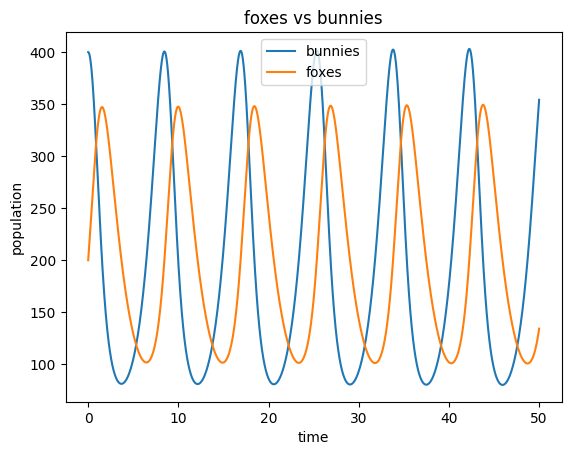

In [ ]:
### ANSWER ME
a = 1
b = 0.005
g = .6
d = .003
B0 = 400
F0 = 200
dt = .001
tmax = 50

time, B,F = runpredprey(a,b,d,g,B0,F0,dt,tmax)

#pop vs time
plt.figure()
plt.plot(time, B, label="bunnies")
plt.plot(time, F,label= "foxes")
plt.xlabel("time")
plt.ylabel("population")
plt.title("foxes vs bunnies")
plt.legend()
plt.show()

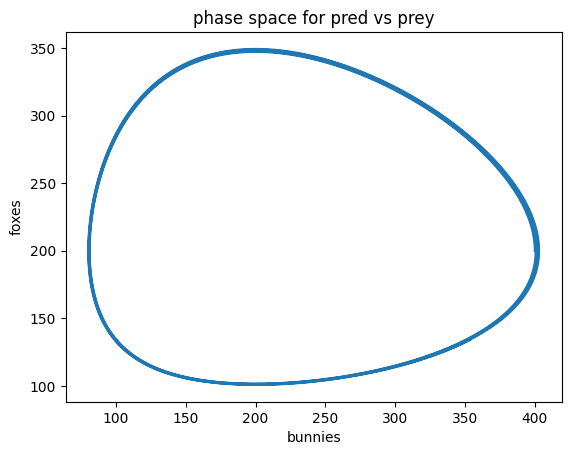

In [ ]:
plt.figure()
plt.plot(B,F)
plt.title('phase space for pred vs prey')
plt.xlabel("bunnies")
plt.ylabel("foxes")
plt.show()

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (start)"></img><br></div>

The dynamics for the parameters above (predator vs prey) result in what is called a limit cycle.  This means that if I start with a given number of predators and prey, the total number cycles in this periodic pattern forever.  You can see this either by seeing periodicity in the prey vs. time plots, or by noting that the phase space plot has a repeating orbit. Make sure to answer all these questions in full sentences with your reasoning.

**Q: For the parameters above, is the first derivative of bunnies or foxes positive (which initially increases)?**

A: First derivative for foxes is positive.

**Q: Suppose you were to reverse the initial conditions, so that there are more predators than prey at the beginning. How would the answer to the above change (you can try it!)?**

A: Bunnies would decrease but foxes are stable initially.

**Q: What is the relationship between the maximum in bunnies vs foxes? In phase, out of phase by 180 degrees, something else?**

A: the prey maximum is out of phase of the predator maximum by around 90 degrees.

### c.  Predator Phase Space Plots

🦉Generate the phase space plots for a $x$ prey and $x/2$ predators for $x \in \{50,100,200,400,600,800,1000,1200,1600\}$. (Use the same parameters as above).
Also generate a plot of the minimum prey seen during an ecosystem simulation for a given number of starting prey.  

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

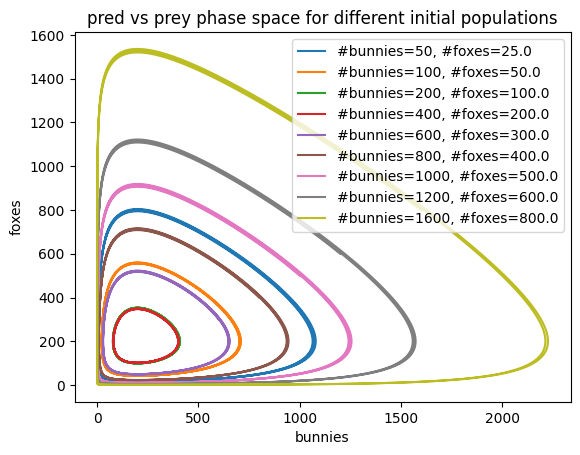

In [ ]:
### ANSWER ME
x = [50,100,200,400,600,800,1000,1200,1600]
minprey = []

plt.figure()
for xi in x:
  B0 = xi
  F0 = xi/2
  time,B, F = runpredprey(a,b,d,g,B0,F0,dt,tmax)
  plt.plot(B,F,label=f'#bunnies={B0}, #foxes={F0}')
  minprey.append(np.min(B))

plt.title('pred vs prey phase space for different initial populations')
plt.xlabel('bunnies')
plt.ylabel('foxes')
plt.legend()
plt.show()

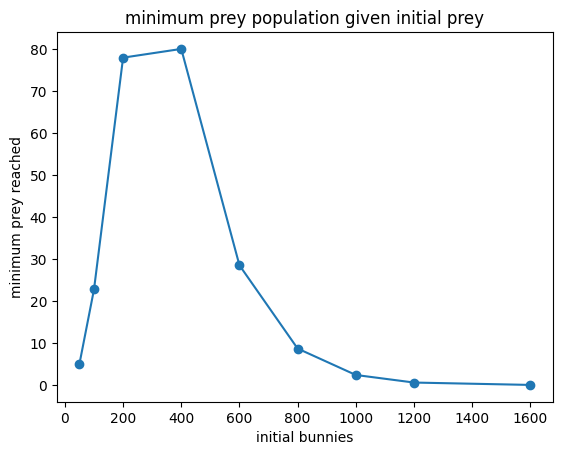

minimum:  0.031628617227225334


In [ ]:
plt.figure()
plt.plot(x,minprey,marker='o')
plt.title("minimum prey population given initial prey")
plt.xlabel('initial bunnies')
plt.ylabel('minimum prey reached')
plt.show()
print("minimum: ", np.min(minprey))

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (start)"></img><br></div>

**Q:  What is the minimum amount of bunnies you ever see in your simulation?**

A: 0.03 bunnies

**Q: As you increase $x$, you will find that the populations start to crash near zero. Which population does that first?**

A: bunnies crash first since predation is larger than reproduction.

**Q: Which value of $x$, do you think is most likely to avoid extinction given these parameters ?**

A: 400



### d. Stationary points

An interesting question we can ask: **is there is some number of prey and predators we can start with so that the total number of prey and predators never change?**  This would be called a fixed point or stationary point.

We will determine the stationary point numerically. 🦉 To accomplish this, let's write a function `getDeviation(initial_population)` which takes the initial population as a list `[preyPopulation,predatorPopulation]` and returns the standard deviation of the number of prey (`np.std(listOfPreyVsTime)`).  If the total number of prey never change then its standard deviation is zero, and otherwise the standard deviation is greater than zero. Therefore, if we minimize the standard deviation then we will find the stationary point.

Now, all we have to do is call `getDeviation` a bunch of times with different parameters and figure out when it returns zero.  There are lots of rich and interesting approaches to optimization problems like this, but we don't have time to explore them.  Here we are going to use a package from python calling `out=scipy.optimize.minimize(getDeviation,x0)`.  When it's finished running, if you print `out.x` you can see which parameters it found.  

**Change $\delta$ from 0.003 to 0.001 here**

🦉Run the optimization and report the number of predator and prey you find.  

Then make a plot of
* prey vs. time and predator vs. time for these initial conditions
* a phase plot of predator vs prey using these initial conditions
.

<div class="alert alert-info" style="color:black;">
<i>Note:</i> On my machine, I had to round the answer to get the proper initial starting point. If you get, for example, 99.99999998, round it to 100
</div>

You also might find it useful to turn off matplotlib's formatting as follows: `matplotlib.rc('axes.formatter', useoffset=False)` so you can see more clearly what numbers are changing.

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

deviation:  0.0
optimize:    message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 0.0
        x: [ 6.000e+02  2.000e+02]
      nit: 0
      jac: [ 7.162e-01  2.743e+00]
 hess_inv: [[1 0]
            [0 1]]
     nfev: 69
     njev: 19
stationary population: [600. 200.]


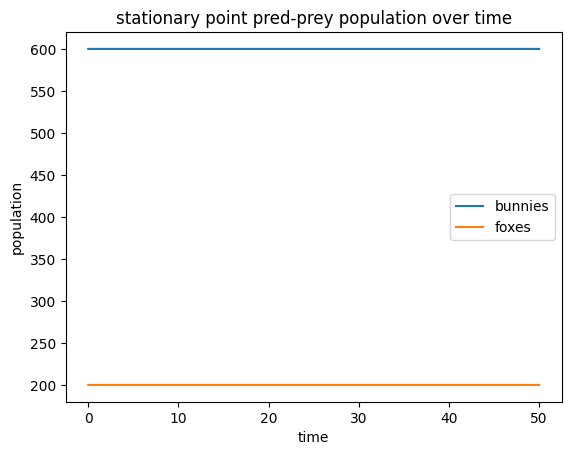

In [ ]:
from scipy.optimize import minimize

matplotlib.rc('axes.formatter', useoffset=False)

d = 0.001
def getDeviation(initial_population):
  B0,F0 = initial_population
  time,B,F = runpredprey(a,b,d,g,B0,F0,dt,tmax)
  return np.std(B)

#initial conditions
x0 = [600,200] #deviation at 600,200
print("deviation: ", getDeviation(x0))
output = minimize(getDeviation,x0)
print("optimize: ", output)
print("stationary population:", np.round(output.x,3))

Beq,Feq = np.round(output.x,3)
time,B,F = runpredprey(a,b,d,g,Beq,Feq,dt,tmax)

plt.figure()
plt.plot(time, B, label='bunnies')
plt.plot(time, F,label='foxes')
plt.xlabel('time')
plt.ylabel('population')
plt.title('stationary point pred-prey population over time')
plt.legend()
plt.show()


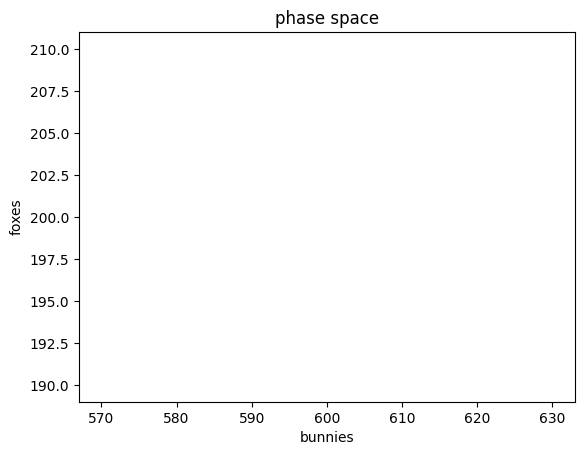

Text(0.5, 1.0, 'phase space at stationary point')

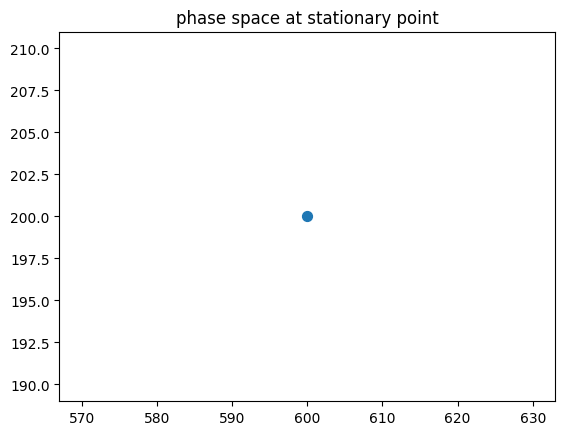

In [ ]:
### ANSWER ME
plt.figure()
plt.plot(B,F)
plt.title('phase space')
plt.xlabel('bunnies')
plt.ylabel('foxes')
plt.show()
#dont see a phase space since the stationary point is found

#will see the point on scatter though
plt.scatter([Beq],[Feq],s=50)
plt.title('phase space at stationary point')

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (start)"></img><br></div>

**Q: Qualitatively what do phase plots look like when a stationary point is found?**

A: Just a single point.

## Exercise 2: Stochasticity in Predator-Prey equations

* **List of collaborators:**

* **References you used in developing your code:**

**Problems with simulating the ecosystem using the Lotka-Volterra equations:**

There are two qualitative problems with simulating ecosystems using the Lotka-Volterra equations:

(1) In our simulations so far, we have found either stationary points or limit cycles.  Both of these are unrealistic.  Ecosystems are more dynamic than this.  It's not the case that once you have a certain population of predator/prey it returns to this number over and over again forever.  This occurs because we are simulating the ecosystem deterministically - there is no randomness involved.  Deterministic equations essentially can only do a few things: they can converge to fixed points, limit cycles or be chaotic.

(2) millibunnies:  You may have noticed in your simulations that you ocassionally saw that your ecosystem had 1/1000 of a bunny and that this 1/1000 of a bunny recovered into a respectable population of 8000 bunnies.  This is unrealistic, since there aren't actually frational animals (and also it prevents extinction events).  To go beyond this we need to recognize the discrete integer-ness of animals, which will require us to also include stochasticity.


### a.  The first bunny

Let's think about what $dB = \alpha B(t) dt$ means.  Previously we thought that it meant that in a unit of time $\Delta t$ we got $\alpha B(t) \Delta t$ new bunnies.  But if $\alpha B(t)$ is 0.2 and $\Delta t=0.1$ we don't get 0.02 bunnies. Instead we can think of it as the probability density of getting one whole new bunny as $20\%$ and so the probability of getting a new bunny in a small interval $\Delta t$ is $0.2 \Delta t$.  


We now ask the following question:  What is the probability of getting your first bunny after time $T+\Delta t$? Well, we've taken $T/\Delta t + 1$ steps. You have to not have gotten a bunny the first $T/\Delta t$ steps. That probability is $(1-0.2 \Delta t)^{T/\Delta t}$.  The probability of getting a bunny at step $T/\Delta t+1$ is $0.2 \Delta t$.   So the total probability density is $(1-0.2 \Delta t)^{(T/\Delta t)} \times 0.2$    

Suppose we take the limit where $\Delta t \rightarrow 0$  The the probability we get a bunny in an interval $\Delta t$ is

$$ 0.2 \Delta t e^{-0.2 T}$$

This follows because

$$ \lim_{t \rightarrow 0} (1-\alpha t)^{T/t}\alpha = \alpha e^{-\alpha T} $$

This is called a Poisson process, and it shows up in many situations, from nuclear decay to phone call frequency. It is essentially saying that a bunny reproduces on average every $1/\alpha$ time, and once it has reproduced, it starts again with no memory of when it last reproduced. You can imagine that such a process might not apply to human behavior but we will use it for bunnies.

Let's test this.

We can write a function `TimeOfFirstBunny(alpha,deltaT)` which takes the
* rate $\alpha$ (which is 0.2 in the above example) and
* time-step $\Delta t$

and then returns the
* first time we get one whole  bunny.  

This function should just loop over steps $dt$ and return the time $t$ if a random number is less then $\alpha \Delta t$.

🦉Run this function 10,000 times with $\alpha=1$ and $dt=0.001$ and plot it with `plt.hist(ts,100,density=1)` (100 sets the number of bins and `density=1` makes sure it is a normalized histogram).

On the same plot, plot

$$P_B(T) = \alpha \exp[-\alpha T]$$  

from $T\in[0,35]$ to compare them. (Recall that if you have a numpy array you can do math operations on them using functions like `np.exp`)


<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

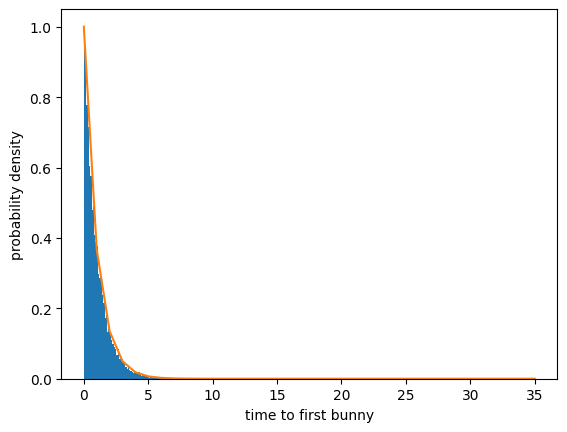

In [ ]:
### ANSWER ME
def TimeOfFirstBunny(alpha,deltaT):
  t = 0.0
  while True:
    if np.random.rand()<alpha*deltaT: return t
    t+= deltaT

a = 1
dt = .001
trials = 10000

times = np.array([TimeOfFirstBunny(a,dt) for i in range(trials)])

plt.figure()
plt.ylabel('probability density')
plt.xlabel('time to first bunny')
plt.hist(times,100,density=1)
T = np.array([i for i in range(36)])
P_t = a*np.exp(-a*T)
plt.plot(T,P_t)
plt.show()

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (start)"></img><br></div>


### b. A faster algorithm to find the first bunny.

Waiting to determine the time of first of bunny using the method of **a.** above is pretty slow. There is another algorithm that's much faster (in the limit of $\Delta t\rightarrow 0$).  The time to first bunny is

$$t= -\log(r)/\alpha$$

where $r$ is a uniform random number between 0 and 1. The idea here is that we are drawing a sample from the Poisson distribution. This method is sometimes called "continuous time" because $t$ can be any real number, and is not decided by a discrete time step.

Instead of analytically verifying this, let's check this numerically.

🦉Write a function `TimeOfFirstBunny2(alpha,deltaT)` which returns $-\log(r)/\alpha$ and make a plot comparing it to $\alpha \exp[-\alpha T]$.


<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

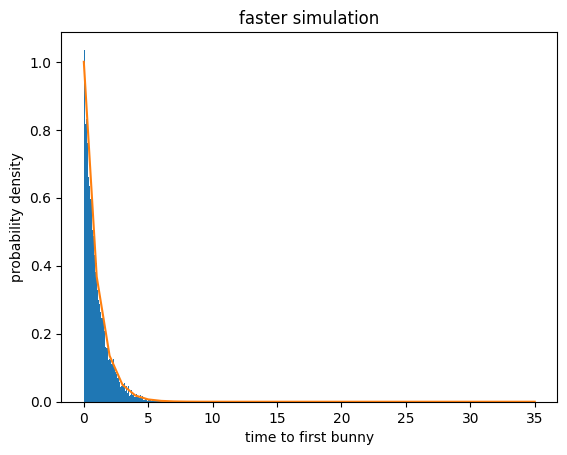

In [ ]:
### ANSWER ME
def TimeOfFirstBunny2(alpha,deltaT):
  r=np.random.rand()
  return -np.log(r)/alpha

times2 = np.array([TimeOfFirstBunny2(a,dt) for i in range(trials)])

plt.figure()
plt.hist(times2,100,density=1)
plt.plot(T,P_t)
plt.ylabel('probability density')
plt.xlabel('time to first bunny')
plt.title('faster simulation')
plt.show()

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (start)"></img><br></div>

### c. Continuous time markov chain

We will now use this to build a stochastic algorithm for predator-prey. Let's translate everything we did above into this new continuous time language:

1.  Prey reproduce at rate $\alpha B(t)$
    * $\frac{dB(t)}{dt} = \alpha B(t)$
    * At time $t_1=-\log(r)/(\alpha B(t))$, the prey $B \rightarrow B+1$

   
2. Predators die at rate $\gamma F(t)$
    * $\frac{dF(t)}{dt} \propto -\gamma F(t)$
    * At time $t_2=-\log(r)/(\gamma F(t))$, the predator $F \rightarrow F-1$
    
3. Predators eat prey at rate $\beta F(t)B(t)$ which cause predators to reproduce at $D F(t)B(t)$
    * $\frac{dB(t)}{dt} = -\beta F(t)B(t)$
    * $\frac{dF(t)}{dt}  = \delta F(t)B(t)$    
    * At time $t_{3a}=-\log(r)/(\beta F(t)B(t))$ the prey $B \rightarrow B-1$
    * At time $t_{3b}=-\log(r)/(\delta F(t)B(t))$ the predator $F \rightarrow F+1$.
        * This latter point is a bit weird but works. Both the fox eating the bunny, and the reproduction of new foxes is proportional to how much the fox eats, so these two processes in practice can be separated in this way.
   


Now for our algorithm:

* Compute times $t_1, t_2, t_{3a}, t_{3b}$.  
    * *use a different random number $r$ for each $t_i$, don't share the same $r$*
* One of these times $t_i$ happens first.
* Perform event$_i$ (add a prey, or remove a predator, etc.) Update $t \rightarrow t+t_i$.
* Forget about all the other times (the rates have changed..you have more prey or something).
    * It feels funny that this is legit, but it is.  (This comes from the fact that poisson processes are memoryless).
* check that we don't have 0 Prey or Predators. If we do, stop the simulation.
* Do it over again.

Write a function `RunEcosystem` which inputs:
* total time $T$
* Initial conditions $B_0$ and $F_0$  
and make sure to keep track of $\alpha,\beta,\gamma,D$.  

Then have `RunEcosystem` apply this stochastic algorithm for time $T$ and return
* a list `ts` of times $t$
* a list `Bs` of prey $B$ at those times.
* a list of `Fs` of prey $F$ at those times.

Notice now that your times will not equally spaced!

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
### ANSWER ME
def RunEcosystem(T,B0,F0,a,b,g,d):
  t=0.0
  B,F=B0,F0
  ts,Bs,Fs = [t],[B],[F]

  while t<T and F>0 and B>0:
    rateaB = a*B
    rategF = g*F
    ratebFB = b*F*B
    ratedFB = d*F*B

    r1,r2,r3a,r3b = np.random.rand(4)
    t1,t2,t3a,t3b = np.inf,np.inf,np.inf,np.inf
    if rateaB>0:
      t1 = -np.log(r1)/rateaB
    if rategF>0:
      t2= -np.log(r2)/rategF
    if ratebFB>0:
      t3a= -np.log(r3a)/ratebFB
    if ratedFB>0:
      t3b = -np.log(r3b)/ratedFB

    minT = min(t1,t2,t3a,t3b)
    if not np.isfinite(minT): break #no next event
    t += minT

    if minT==t1: B+=1
    elif minT==t2: F-=1
    elif minT==t3a: B-=1
    elif minT==t3b:F+=1
    ts.append(t)
    Bs.append(B)
    Fs.append(F)

  return np.array(ts),np.array(Bs),np.array(Fs)

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (start)"></img><br></div>

### d.  Stochastic Populations

🦉Plot
* Population vs t
    * prey vs t
    * predators vs t
* Phase plot (predator vs prey)

for $T=50$, $B(t=0)=100$, $F(t=0)=50$, and $\alpha$=1.0, $\beta$=0.005, $\gamma=0.6$, and $\delta=0.003$

On the same plots, show the results for the deterministic algorithms. Run it a few times to see the effect of stochasticity.


<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

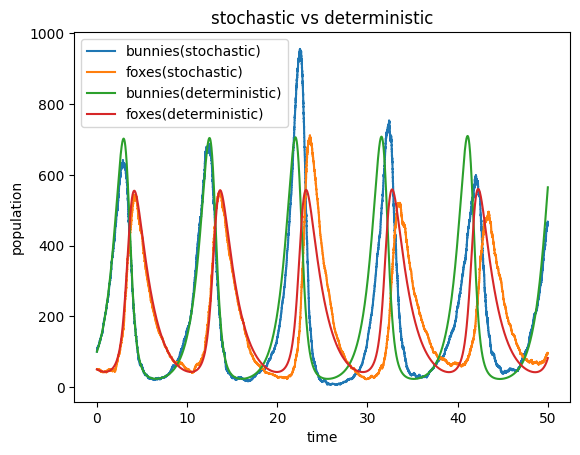

In [ ]:
### ANSWER ME
T,B0,F0,a,b,g,d = 50,100,50,1.0,.005,.6,.003
ts,Bs,Fs=RunEcosystem(T,B0,F0,a,b,g,d)
td,Bd,Fd=runpredprey(a,b,d,g,B0,F0,.001,T)

plt.step(ts,Bs,label='bunnies(stochastic)')
plt.step(ts,Fs,label='foxes(stochastic)')
plt.plot(td,Bd,label='bunnies(deterministic)')
plt.plot(td,Fd,label='foxes(deterministic)')
plt.xlabel('time')
plt.ylabel('population')
plt.title('stochastic vs deterministic')
plt.legend()
plt.show()

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (start)"></img><br></div>

### e. Stationary again
🦉Do the same thing as **d.** for the parameters you found above which give you a stationary point. Don't forget to change $\delta=0.001$ For this, go out to $T=1000$


<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

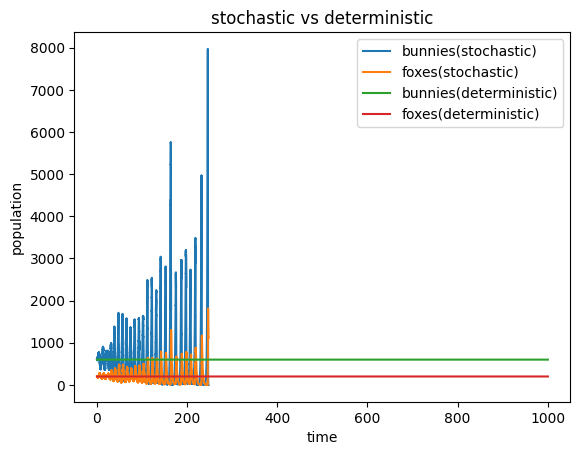

In [ ]:
### ANSWER ME
d=.001
B0=600
F0=200
T=1000
ts,Bs,Fs=RunEcosystem(T,B0,F0,a,b,g,d)
td,Bd,Fd=runpredprey(a,b,d,g,B0,F0,.001,T)
plt.step(ts,Bs,label='bunnies(stochastic)')
plt.step(ts,Fs,label='foxes(stochastic)')
plt.plot(td,Bd,label='bunnies(deterministic)')
plt.plot(td,Fd,label='foxes(deterministic)')
plt.xlabel('time')
plt.ylabel('population')
plt.title('stochastic vs deterministic')
plt.legend()
plt.show()


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (start)"></img><br></div>

**Q:** Do the number of bunnies change as a function of time?

A: Number of bunnies do not change for deterministic, but for stochastic simulation oscillates from T=0-80 but after this point the number of bunnies explodes.

**Q:** Qualitatively what is the effect of running the stochastic simulation at the stationary point?

A: the stochastic simulation brings small but consistent fluctuations around the equilibrium. this is similar to creating variability in the ecosystem but keeping the mean steady for a short time. But at a long time, the graph doesn't stay around the mean anymore.

### e. Extinction

In this part we are going to determine the amount of time until one of the two species goes extinct given the initial number of prey/predators. Let's call this an extinction event.

Use parameters
* $\alpha=1.0$
* $\beta=0.008$
* $\gamma=0.3$
* $\delta=0.002$

and assume we start with the same number of predators and prey.

🦉For $B_0\in$ `preyNum` w/ `preyNum=np.arange(20,600,1)`, run your ecosystem until there is one extinction event. Record the time $t$ this event happened and graph $t$ vs. initial prey number.

<div class="alert alert-info" style="color:black">
Because of the randomness involved, this may take a while to run (~5 minutes). Feel free to test this with <code>np.arange(20,60,1)</code> first.
</div>

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
### ANSWER ME
a,b,g,d = 1,.008,.3,.002
T=500
prey=np.arange(20,600,1)
times=[]

for B0 in prey:
  F0=B0
  ts,Bs,Fs = RunEcosystem(T,B0,F0,a,b,g,d)
  times.append(ts[-1])

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (start)"></img><br></div>

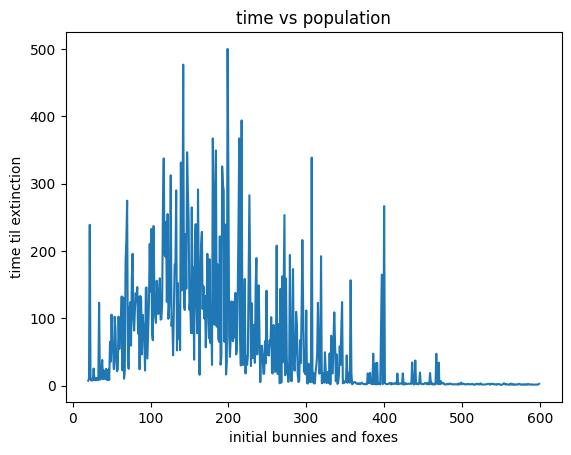

In [ ]:
plt.figure()
plt.plot(prey, times)
plt.xlabel('initial bunnies and foxes')
plt.ylabel('time til extinction')
plt.title('time vs population')
plt.show()

### f. Window Averaging (cleaning data)

This data is going to look noisy. 🦉To make it look nicer do a running mean of your data with a window-size of 20 and plot it. This will be smoother.  

What value is your largest time to extinction (post window-averaging)? I find my results are around 160-190

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

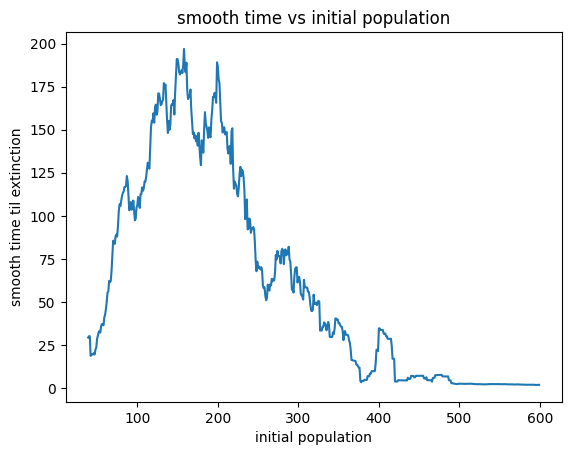

maximum extinction time after smoothing:  196.9363974525451


In [ ]:
### ANSWER ME
#np.convolve() does running mean with window size: https://numpy.org/devdocs/reference/generated/numpy.convolve.html

windowsize = 20
clean = np.convolve(times,np.ones(windowsize)/windowsize, mode='valid') #valid gives same size
plt.plot(prey[windowsize-1:],clean)
plt.xlabel('initial population')
plt.ylabel('smooth time til extinction')
plt.title('smooth time vs initial population')
plt.show()

print("maximum extinction time after smoothing: ", np.max(clean))
#less spikes now, looks better



<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (start)"></img><br></div>

**Q:** I would have expected that this curve would be more monotonic. The more prey you had, the less likely anyone would go extinct.  Is this correct? Do a calculation with B0=600 and describe why the bunnies go extinct quickly.

A: Since we start with equal numbers of foxes and bunnies, both populations increase together. So when B0=F0=600, the rate beta\*F\*B gets huge so the foxes consume the bunnies faster than the bunnies can reproduce.

## Exercise 3:  Agent Based Predator-Prey Simulation


This is Extra Credit!

* **List of collaborators:**

* **References you used in developing your code:**

In this exercise, we want to simulate an agent-based model of the predator-prey simulation.  Instead of the previous exercises where you are using a differential equation, here we are going to simulate each individual bunny and fox separately as an *agent*.  These bunnies and foxes are going to live on a $s \times s$ grid.  Foxes will keep track of how full they are.  All foxes are born with a fullness amount $F$.   The dynamics of our simulation will be:

* The bunnies and foxes will be allowed to move around the grid.   At each time step, every bunny and every fox will decide either to stay where they are or try to move in one of four directions.  If they decide to try to move, they will move if its empty of the same type of animal (i.e. foxes don't move to where foxes are).  If someone is in the direction they wanted to go, they will stay where they are.  
* Every time step, the fox gets $f$ less full.
* When the foxes and bunnies are on the same grid point (after everyone moves) one fox on that grid (pick arbitrarily) eats all the bunnies on that grid. The foxes full-ness increases by the number of bunnies they eat.
* An $\alpha$ fraction of bunnies reproduce (appearing at the same location) at each time-step.
* All foxes whose full $F$ is more then $R$, reproduce (at the same location) at each time-step.
* All foxes whose full $F$ is less then 0 starve.

To do this, we are going to have a class to store each "fox" or "bunny":
```python
@dataclass
class fox:
    location: list = field(default_factory=list)
    full: int = 2
```

and
```python
@dataclass
class bunny:
    location: list = field(default_factory=list)
    eaten: bool = False   
```
The fox starts full with an amount 2 and the bunny starts not eaten.   There is no default location for them.

To set up a fox you can do `myFox=fox()` and to access the location of the fox you can do `myFox.location`.  If you want to push your fox back onto a list you can do `myList.append(fox())`.

To implement this project, you will use four data structures:
* a list of foxes
* a list of bunnies
* a $s\times s$ numpy array foxLocations that shows how many foxes are in each grid
* a $s\times s$ numpy array bunnyLocations that shows how many bunnies are in each grid.

To set things up, first set up the grid with a density of 10% bunnies and 1% foxes.

```python
foxLocations=np.random.choice(2, size*size, p=[.99,0.01]).reshape(size,size)
bunnyLocations=np.random.choice(2, size*size, p=[.9,0.1]).reshape(size,size)
```

Write code
```python
def LocationsToList(locations):
```
which takes the bunnyLocations (foxLocations) and generate a list of bunnies (foxes) with correctly intialized `fox.Location` and `bunny.Location` parameters  -i.e.  suppose your grid has bunnies at locations (1,2) and (4,3).  Then `LocationToList(bunnyLocations)` should return something like the bunnies list from

```python
    bunnies=[]
    bunnies.append(bunny())
    bunnies[-1].location=[1,2]
    bunnies.append(bunny())
    bunnies[-1].location=[4,3]
    return bunnies
```
(obviously you have to make this work no matter what's in bunnyLocations).


Also write a function
```python
def GetLocations(animalList)
```
that does the opposite.  It tkes the list of bunnies (foxes) and produces the location array of bunnies (foxes).

You can test that these work by call `LocationsToList(GetLocations(LocationsToList(myLocations)))` to get back the same thing you started with.

Your next step is to write a function
```python
def Move(creature,creatureLocations)
```
which (say we are doing foxes)
* loops over all the foxes
    * for each fox flips a nine-sided coin and decides whether to stay or go a particular direction
    * attempts to go that direction and does so if no fox is there (otherwise stays put)
    * Update the location in the fox class and **updates the location array of the fox appropriately**  You should check when you leave the function that the locations are still correct.
    
You should be able to check that you move class works.  One good test is to make a bunch of moves and verify that the total number of creatures stays fixed. Also check that `np.sum(foxLocations)` and `len(foxes)` is the same.  Also check that `np.max(foxLocations)` is one and `np.min(foxLocations)` is zero.

After you've written the move function, now you can write the function
```python
def Eat(bunnies,foxes,bunnyLocations,foxLocations):
```

If there are foxes and bunnies on the same cell, have the foxes eat all the bunnies making sure you update
* the bunny locations (they're gone)
* the bunny eaten flag
* the fox full state

Also remove any eaten bunnies by the end of the function.

Finally, implement two reproduce functions separately for foxes and bunnies.  The fox function should do the following:
* if the foxes full state is $\leq 0$ then the fox starves
* if the foxes full state is $\geq 5$ then the fox reproduces.

The bunny function should do the following:
* an $\alpha$'th fraction of the bunnies should reproduce.

Use
* $\alpha=0.01$
* $R=5$
* $s=80$
* $f=0.1$

Run your code and plot both
* bunnies and foxes vs. time
* a phase plot of foxes vs. bunnies
* an animation (see the code below).  To do the animation you need to keep snapshots of the fox-locations and bunny-locations at each step.

You should see features reminiscent of your previous work.


<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
### ANSWER ME

In [ ]:
### ANSWER ME

In [ ]:
# Assumes locsF and locsB is a list of locations at each time step

def AnimateMe():

    def GetData(mm):
        mm=min(mm,len(locsF)-3)
        maskFox=locsF[mm]>0
        maskBunny=locsB[mm]>0
        toShow=np.zeros(np.shape(maskFox))
        toShow[maskFox]=1
        toShow[maskBunny]=-1
        return toShow

    fig=plt.figure(figsize=(20,10))

    plot = plt.imshow(GetData(0))
    plt.axis('image')

    def init():
        plot.set_data(GetData(0))
        return plot

    def update(j):
        plot.set_array(GetData(j))
        return plot,

    from IPython.display import HTML
    anim = FuncAnimation(fig, update, frames=len(locsF), interval = 30, blit=True,repeat=False)
    plt.close()
    return anim
anim=AnimateMe()
HTML(anim.to_jshtml())


NameError: name 'plt' is not defined

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (start)"></img><br></div>


**Acknowledgements:**
* Bryan Clark (original)

© Copyright 2020

--